In [18]:
import random
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [19]:
x_train=np.loadtxt('input_test.csv',delimiter=',')
y_train=np.loadtxt('labels_test.csv',delimiter=',')
x_test=np.loadtxt('input_test.csv',delimiter=',')
y_test=np.loadtxt('labels_test.csv',delimiter=',')

In [20]:
x_train=x_train.reshape(len(x_train),100,100,3)
y_train=y_train.reshape(len(y_train),1)
x_test=x_test.reshape(len(x_train),100,100,3)
y_test=y_test.reshape(len(y_train),1)
x_train=x_train/255
x_test=x_test/255

In [21]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
h=model.fit(x_train,y_train,epochs=15,batch_size=64)

Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.4705 - loss: 1.2495
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - accuracy: 0.4979 - loss: 0.7038
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - accuracy: 0.5330 - loss: 0.6898
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 242ms/step - accuracy: 0.5317 - loss: 0.6925
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 267ms/step - accuracy: 0.5374 - loss: 0.6897
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 271ms/step - accuracy: 0.4977 - loss: 0.6821
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.5264 - loss: 0.6703
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 225ms/step - accuracy: 0.5690 - loss: 0.6587
Epoch 9/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 279ms/step - accuracy: 0.5122 - loss: 0.6436
Epoch 10/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 267ms/step - accuracy: 0.7853 - loss: 0.6594
Epoch 11/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step - accuracy: 0.5828 - loss: 0.6447
Epoch 12/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.6055 - lo

In [24]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9245 - loss: 0.6099


[0.5467531085014343, 0.8999999761581421]

<function matplotlib.pyplot.show(close=None, block=None)>

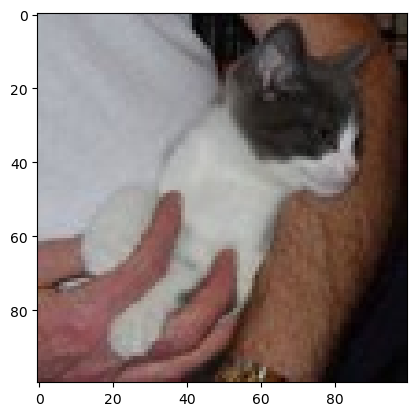

In [34]:
idx=random.randint(0,len(y_test))
plt.imshow(x_test[idx,:])
plt.show

In [35]:
pred=model.predict(x_test[idx,:].reshape(1,100,100,3))
pred=pred>0.5
if pred==0:
    print("this is dog")
else:
    print("this is cat")
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
this is cat
